In [1]:
# modules

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate

# Zadanie 1

T = 1     magnetyzacja = 0.9996
T = 2     magnetyzacja = 0.9162
T = 3     magnetyzacja = 0.5319
T = 4     magnetyzacja = 0.3364
T = 5     magnetyzacja = 0.2783


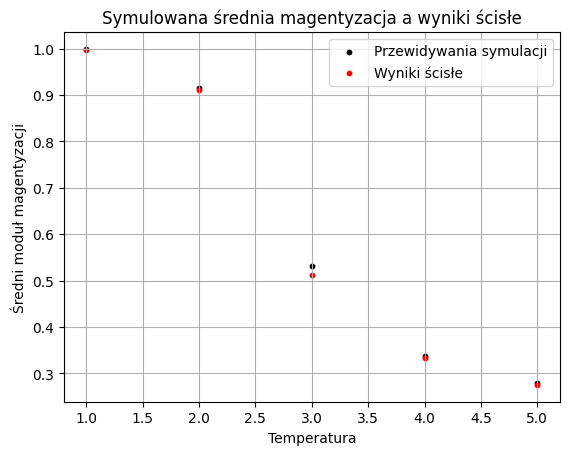

In [2]:
# function summing spins from neighbors

def near_spins(point, lattice, dim):
    out = 0

    for i in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        new_point = point + np.array(i)
        new_point[0] = new_point[0] % dim
        new_point[1] = new_point[1] % dim
        
        out += lattice[new_point[0], new_point[1]]
        
    return out

# function calculating probability of spin equal to 1

def probability(h, B, J):
    return 1 / (1 + np.exp(-B * 2 * J * h))

# constants

J_const = 1

# mean magnetization function operating on already prepared lattice

def magnetization(temp, lattice, start, dim):
    steps_num = 6000
    magn = []

    for step in range(steps_num):
        for timer in range(20):
            i = np.random.choice(list(range(dim**2)))
            point = np.array((i // dim, i % dim ))
            prob = probability(near_spins(point, lattice, dim), 1/temp, J_const)
            lattice[point[0], point[1]] = np.random.choice(a = [-1, 1], p = [1 - prob, prob])
        if step > start:
            magn.append(np.abs(np.mean(lattice)))

    return magn

# calculations

values = []

for T in range(1, 6):

    the_lattice = np.ones([5, 5])
    value = round(np.mean(magnetization(T, the_lattice, 1000, 5)), 4)
    values.append(value)
    print("T = " + str(T) + "     magnetyzacja = " + str(value))

# plot

opis = []
plt.scatter([1, 2, 3, 4 ,5], values, color = "black", s = 10)
opis.append("Przewidywania symulacji")
plt.scatter([1, 2, 3, 4, 5], [0.998, 0.912, 0.512, 0.334, 0.275], color = "red", s = 10)
opis.append("Wyniki ścisłe")
plt.title("Symulowana średnia magentyzacja a wyniki ścisłe")
plt.xlabel("Temperatura")
plt.ylabel("Średni moduł magentyzacji")
plt.legend(opis, bbox_to_anchor = [1, 1])
plt.grid()
plt.show()

# Zadanie 2

In [3]:
magn10 = []
for T in range(1, 6):
    the_lattice = np.ones([10, 10])
    magn10.append(magnetization(T, the_lattice, 2000, 10))

mean_magn10 = [np.mean(m) for m in magn10]
podatn_magn10 = [np.var(m) for m in magn10]

magn20 = []
for T in range(1, 6):
    the_lattice = np.ones([20, 20])
    magn20.append(magnetization(T, the_lattice, 2000, 20))

mean_magn20 = [np.mean(m) for m in magn20]
podatn_magn20 = [np.var(m) for m in magn20]

def onsager(T):
    if T > 2 / np.log(1 + math.sqrt(2)):
        return 0
    else:
        return (1 - 1/math.sinh(2 * J_const / T)) ** 0.125

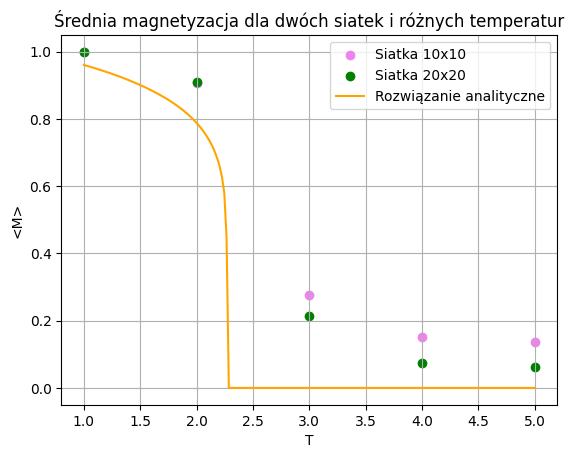

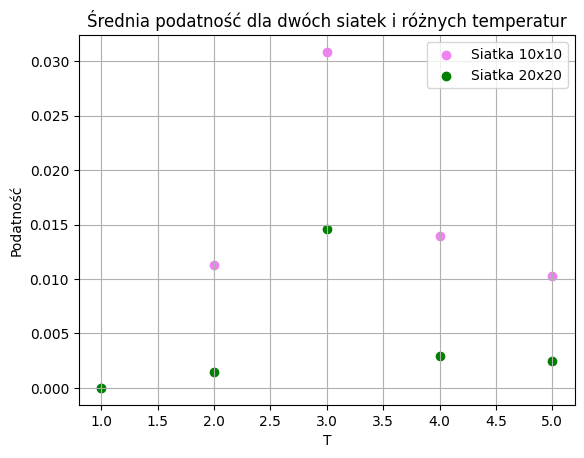

In [4]:
# wykres magnetyzacji

opis = []
plt.scatter(range(1, 6), mean_magn10, color = "violet")
opis.append("Siatka 10x10")
plt.scatter(range(1, 6), mean_magn20, color = "green")
opis.append("Siatka 20x20")
line = np.linspace(1, 5, 200)
plt.plot(line, [onsager(x) for x in line ], color = 'orange')
opis.append("Rozwiązanie analityczne")
plt.legend(opis, bbox_to_anchor = [1, 1])
plt.title("Średnia magnetyzacja dla dwóch siatek i różnych temperatur")
plt.xlabel("T")
plt.ylabel("<M>")
plt.grid()
plt.show()

# wykres podatności

opis = []
plt.scatter(range(1, 6), podatn_magn10, color = "violet")
opis.append("Siatka 10x10")
plt.scatter(range(1, 6), podatn_magn20, color = "green")
opis.append("Siatka 20x20")
plt.legend(opis, bbox_to_anchor = [1, 1])
plt.title("Średnia podatność dla dwóch siatek i różnych temperatur")
plt.xlabel("T")
plt.ylabel("Podatność")
plt.grid()
plt.show()